In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import random
from pprint import pprint

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('../data/train_bikes.csv', parse_dates=['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train_df = df.iloc[:6532, :].copy()
val_df = df.iloc[6532:8709, :].copy()
test_df = df.iloc[8709:, :].copy()

In [5]:
for X in [train_df, val_df, test_df]:
    X.sort_values(by='datetime', inplace=True)

    X['day_of_year'] = X.datetime.dt.dayofyear
    X['day_of_month'] = X.datetime.dt.day

    X['quarter'] = X.datetime.dt.quarter
    X['week'] = X.datetime.dt.isocalendar().week # use isocalendar().year / week / day

    X['time_of_day'] = pd.cut(X['datetime'].dt.hour, bins=[0,6,9,15,19,24], labels=['early_morning', 'morning_rush', 'midday', 'evening_rush', 'night'], right=False, include_lowest=True)

    X['is_month_end'] = X.datetime.dt.is_month_end
    X['is_month_start'] = X.datetime.dt.is_month_start

    X['is_quarter_end'] = X.datetime.dt.is_quarter_end
    X['is_quarter_start'] = X.datetime.dt.is_quarter_start

    X['is_year_end'] = X.datetime.dt.is_year_end
    X['is_year_start'] = X.datetime.dt.is_year_start

    X['target'] = X['count']
    X['date'] = X.datetime.dt.date

    X.set_index('date', inplace=True)
    X.drop(['count','datetime'], axis=1, inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6532 entries, 2011-01-01 to 2012-03-09
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   season            6532 non-null   int64   
 1   holiday           6532 non-null   int64   
 2   workingday        6532 non-null   int64   
 3   weather           6532 non-null   int64   
 4   temp              6532 non-null   float64 
 5   atemp             6532 non-null   float64 
 6   humidity          6532 non-null   int64   
 7   windspeed         6532 non-null   float64 
 8   casual            6532 non-null   int64   
 9   registered        6532 non-null   int64   
 10  day_of_year       6532 non-null   int64   
 11  day_of_month      6532 non-null   int64   
 12  quarter           6532 non-null   int64   
 13  week              6532 non-null   UInt32  
 14  time_of_day       6532 non-null   category
 15  is_month_end      6532 non-null   bool    
 16  is_month_start

In [6]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,day_of_year,day_of_month,quarter,week,time_of_day,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,target
date,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,1,1,1,52,early_morning,False,True,False,True,False,True,16
2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,1,1,1,52,early_morning,False,True,False,True,False,True,40
2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,1,1,1,52,early_morning,False,True,False,True,False,True,32
2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,1,1,1,52,early_morning,False,True,False,True,False,True,13
2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,52,early_morning,False,True,False,True,False,True,1


---
## Helper Functions

### Check Purity

In [7]:
def check_purity(data):
    if isinstance(data, pd.DataFrame):
        data = data.values
    target_col = data[:,-1]
    unique_classes = np.unique(target_col)
    if len(unique_classes) == 1:
        return True
    else:
        return False

### Classify

In [8]:
def create_leaf(data, ml_task):

    if isinstance(data, pd.DataFrame):
        data = data.values

    target_col = data[:,-1]

    # Regression
    if ml_task == 'regression':
        leaf = np.mean(target_col)

    # Classification
    else:
        unique_classes, class_counts = np.unique(target_col, return_counts=True)
        idx = class_counts.argmax()
        leaf = unique_classes[idx]

    return leaf

### Potential Splits

In [9]:
def get_potential_splts(data):
    
    if isinstance(data, pd.DataFrame):
        data = data.values
        
    potential_splits = {}
    n_cols = data.shape[1]

    for col_idx in range(n_cols -1):
        
        potential_splits[col_idx] = []
        vals = data[:, col_idx]
        unique_vals = np.unique(vals)

        potential_splits[col_idx] = unique_vals

    return potential_splits

### Split data

In [10]:
def split_data(data, split_col, split_val):

    if isinstance(data, pd.DataFrame):
        data = data.values

    split_col_vals = data[:, split_col]

    feature_type = FEATURE_TYPES[split_col]
    
    # Continuous features
    if feature_type == 'continuous':
        data_below = data[split_col_vals <= split_val]
        data_above = data[split_col_vals > split_val]
    # Categorical features
    else:
        data_below = data[split_col_vals == split_val]
        data_above = data[split_col_vals != split_val]

    return data_below, data_above

### Determine best splits

In [11]:
def calculate_mse(data):

    if isinstance(data, pd.DataFrame):
        data = data.values
    
    actual_vals = data[:, -1]

    # Check for edge case where data is empty
    if len(actual_vals) == 0:
        mse = 0
        
    else:
        preds = np.mean(actual_vals)
        mse = np.mean((actual_vals - preds) **2)

    return mse

In [12]:
def calculate_entropy(data):

    if isinstance(data, pd.DataFrame):
        data = data.values

    target_col = data[:,-1]
    counts = np.unique(target_col, return_counts=True)[1]

    probabilities = counts/counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

In [13]:
def calculate_overall_metric(data_below, data_above, metric_function):

    n_data = len(data_below) + len(data_above)
    
    p_data_below = len(data_below) / n_data
    p_data_above = len(data_above) / n_data

    overall_metric = (p_data_below * metric_function(data_below) +
                       p_data_above * metric_function(data_above))
    
    return overall_metric

In [14]:
def determine_best_split(data, potential_splits, ml_task):

    if isinstance(data, pd.DataFrame):
        data = data.values

    first_iteration = True

    for col_idx in potential_splits:

        for val in potential_splits[col_idx]:
            
            data_below, data_above = split_data(data, split_col=col_idx, split_val=val)

            # Regression
            if ml_task == 'regression':
                current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_mse)

            # Classification
            else:
                current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_entropy)


            if first_iteration or current_overall_metric <= best_overall_metric:
                first_iteration = False

                best_overall_metric = current_overall_metric
                best_split_col = col_idx
                best_split_val = val

    return best_split_col, best_split_val

In [15]:
def get_feature_type(df):

    feature_types = []
    threshold = 15

    for col in df.columns:
        unique_vals = df[col].unique()
        example_val = unique_vals[0]
        if isinstance(example_val, str) or (len(unique_vals) <= threshold):
            feature_types.append('categorical')
        else:
            feature_types.append('continuous')

    return feature_types

---
## Decision Tree Algorithm

#### Representation of Decision Tree
```Python
sub_tree = {"question": ["yes_answer", 
                         "no_answer"]}

example_tree = {"petal_width <= 0.8": ["Iris-setosa", 
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                        "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}

```

In [16]:
def decision_tree(df, ml_task, counter=0, min_samples=2, max_depth=5):
    
    # Check and ensure valid ml_task
    valid_tasks = ['regression','classification']
    if ml_task not in valid_tasks:
        raise ValueError(f'{ml_task} is not a valid ml_task. Choose one of {valid_tasks}')

    # Data preparation
    if counter == 0:
        global COLUMN_NAMES, FEATURE_TYPES
        COLUMN_NAMES = df.columns
        FEATURE_TYPES = get_feature_type(df)
        data=df.values
    else:
        data = df

    # Base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        leaf = create_leaf(data, ml_task)
        return leaf
    
    # Recursion
    else:
        counter += 1

        # Helper functions
        potential_splits = get_potential_splts(data)
        split_col, split_val = determine_best_split(data, potential_splits, ml_task)
        data_below, data_above = split_data(data, split_col, split_val)

        # Check for empty potential splits lists
        if len(data_below) == 0 or len(data_above) == 0:
            leaf = create_leaf(data, ml_task)
            return leaf

        # Instatiate sub tree
        feature_name = COLUMN_NAMES[split_col]
        feature_type = FEATURE_TYPES[split_col]
        
        if feature_type == 'continuous':
            question = f'{feature_name} <= {split_val}'
        else:
            question = f'{feature_name} = {split_val}'

        sub_tree = {question: []}            

        # Find answers using recursion
        yes_answer = decision_tree(data_below, ml_task, counter, min_samples, max_depth)
        no_answer = decision_tree(data_above, ml_task, counter, min_samples, max_depth)

        # Check final answer and append question answers
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

In [17]:
tree = decision_tree(train_df, ml_task='regression', counter=0, min_samples=2, max_depth=5)

---
## Prediction

This maybe needs a a change to the logic to handle cases in which the a categorical feature's class names contain spaces

In [18]:
def predict_example(example, tree):

    question = list(tree.keys())[0]
    feature_name, operator, value = question.split()

    # Ask question
    if operator == '<=':
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # Base case
    if not isinstance(answer, dict):
        return answer
    
    # Recursion
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

In [19]:
# def predict_example(example, tree):
#     # Extract the question from the tree
#     question = list(tree.keys())[0]

#     # Safely split the question into components
#     parts = question.split()
#     if len(parts) < 3:
#         raise ValueError(f"Invalid question format: '{question}'")

#     # Handle multi-word feature names or values
#     feature_name = parts[0]
#     operator = parts[1]
#     value = " ".join(parts[2:])  # Combine everything after the operator as the value

#     # Convert the value to the appropriate type (float if possible)
#     try:
#         value = float(value)
#     except ValueError:
#         pass  # Leave as string if it can't be converted

#     # Ask question
#     if operator == "<=":
#         answer = tree[question][0] if example[feature_name] <= value else tree[question][1]
#     elif operator == "=":
#         answer = tree[question][0] if example[feature_name] == value else tree[question][1]
#     else:
#         raise ValueError(f"Unsupported operator in question: '{operator}'")

#     # Recursion or return answer
#     if isinstance(answer, dict):
#         return predict_example(example, answer)
#     else:
#         return answer


In [20]:
example = val_df.iloc[4]
example

season                    1
holiday                   0
workingday                1
weather                   1
temp                  17.22
atemp                 21.21
humidity                 28
windspeed           31.0009
casual                   49
registered              129
day_of_year              69
day_of_month              9
quarter                   1
week                     10
time_of_day          midday
is_month_end          False
is_month_start        False
is_quarter_end        False
is_quarter_start      False
is_year_end           False
is_year_start         False
target                  178
Name: 2012-03-09, dtype: object

In [21]:
predict_example(example, tree)

183.21186440677965

---
## Accuracy

In [22]:
def calculate_accuracy(df, tree):

    df['classification'] = df.apply(predict_example, axis=1, args=(tree,))
    df['classification_correct'] = df.classification == df.target

    accuracy = df.classification_correct.mean()

    return accuracy

---
## Hyperparameter Tuning

In [23]:
def calculate_r2(df, tree):
    labels = df.target
    mean = labels.mean()
    preds = df.apply(predict_example, args=(tree,), axis=1)

    ss_res = sum((labels - preds) **2)
    ss_tot = sum((labels - mean) **2)
    r2 = 1 - (ss_res / ss_tot)

    return r2

In [ ]:
def grid_search(df, ml_task, params):
    param_grid = list(params.items())
    for param, param_vals in params.items():



In [24]:
grid_search = {'max_depth':[],
               'min_samples':[],
               'r2_train':[],
               'r2_val':[]}

for max_depth in range(2, 11):
    for min_samples in range(5, 30, 5):
        tree = decision_tree(train_df, ml_task='regression', max_depth=max_depth, min_samples=min_samples)

        r2_train = calculate_r2(train_df, tree)
        r2_val = calculate_r2(val_df, tree)

        grid_search['max_depth'].append(max_depth)
        grid_search['min_samples'].append(min_samples)
        grid_search['r2_train'].append(r2_train)
        grid_search['r2_val'].append(r2_val)

grid_search = pd.DataFrame(grid_search)
best_params = grid_search.sort_values('r2_val', ascending=False)

best_params.head()

,max_depth,min_samples,r2_train,r2_val
40,10,5,0.999675,0.959590
35,9,5,0.999289,0.959275
30,8,5,0.998448,0.958805
41,10,10,0.999438,0.957916
36,9,10,0.999118,0.957763


In [25]:
grid_search = pd.DataFrame(grid_search)
best_params = grid_search.sort_values('r2_val', ascending=False)

best_params.head()

,max_depth,min_samples,r2_train,r2_val
40,10,5,0.999675,0.959590
35,9,5,0.999289,0.959275
30,8,5,0.998448,0.958805
41,10,10,0.999438,0.957916
36,9,10,0.999118,0.957763


---
## Visualization

In [26]:
best_max_depth = best_params.iloc[0]['max_depth']
best_min_samples = best_params.iloc[0]['min_samples']

tree = decision_tree(train_df, ml_task='regression', max_depth=best_max_depth, min_samples=best_min_samples)
test_r2 = calculate_r2(test_df, tree)

In [27]:
def create_plot(df, tree, title):
    preds = df.apply(predict_example, args=(tree,), axis=1)
    actual = df.target
    plot_df = pd.DataFrame({'actual':actual,
                            'predictions':preds})

    plot_df.plot(figsize=(18,5), title=title)

    return

(14975.0, 15033.0)

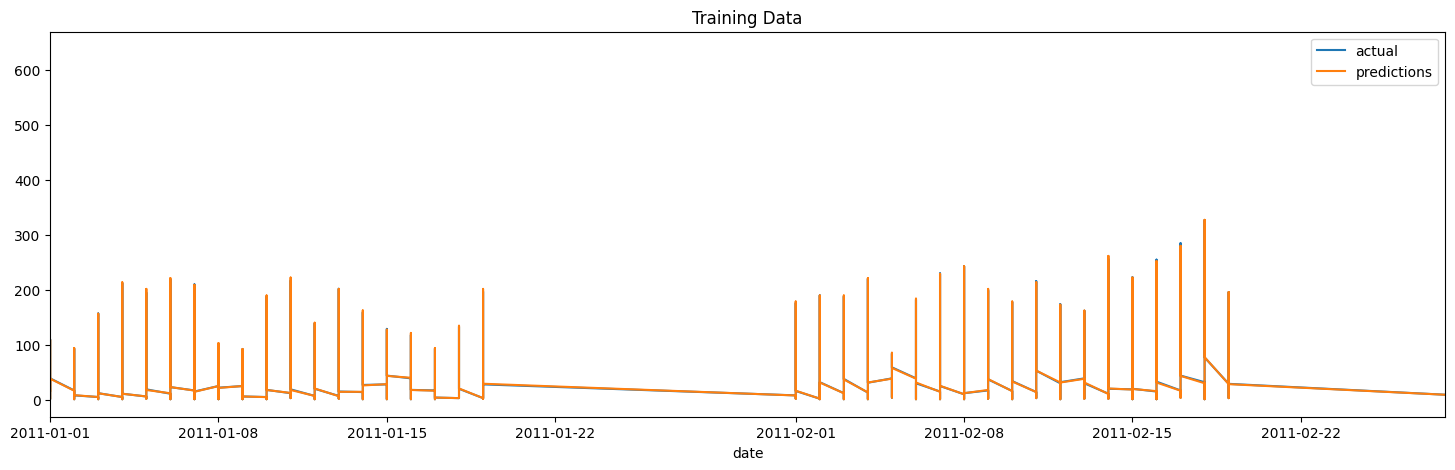

In [31]:
create_plot(train_df, tree, title='Training Data')
plt.xlim(pd.to_datetime('2011-01-01'), pd.to_datetime('2011-02-28'))

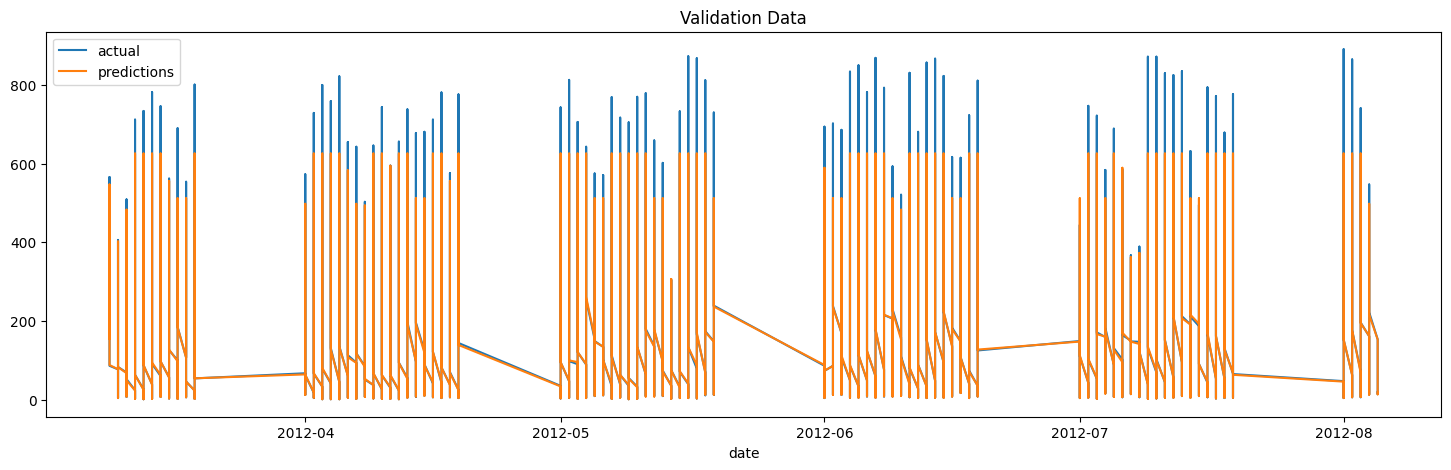

In [29]:
create_plot(val_df, tree, title='Validation Data')

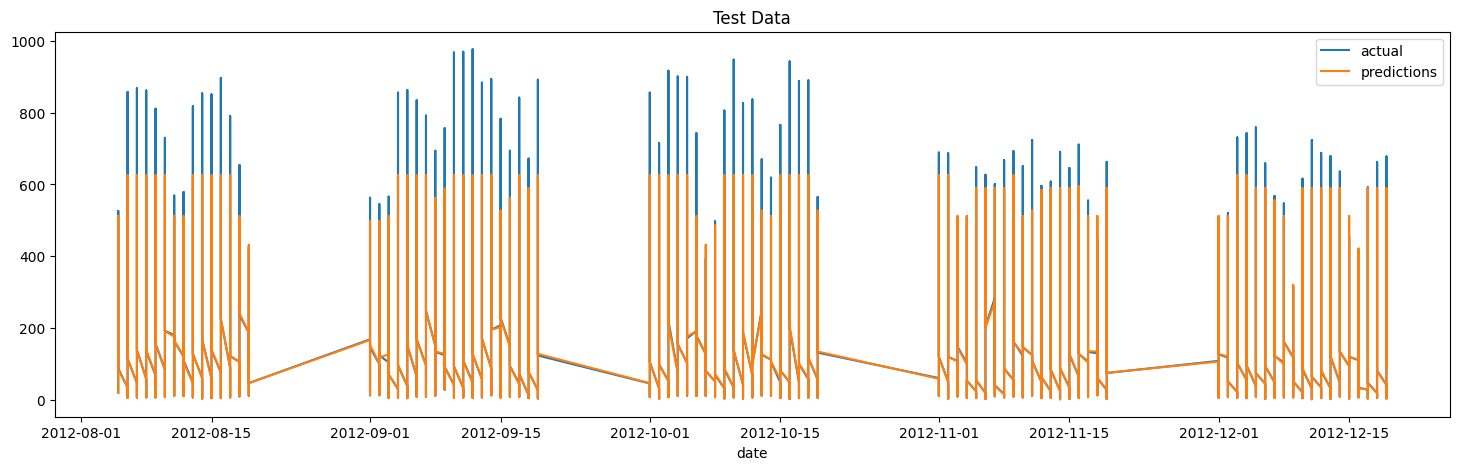

In [30]:
create_plot(test_df, tree, title='Test Data')